In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
from holidays import US
import matplotlib.pyplot as plt
import seaborn as sns
from holidays import country_holidays

In [2]:
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['Chicago']

In [3]:
file_paths = ['Data/Chicago/Chicago-Crime_2001.csv','Data/Chicago/Chicago-Crime_2002.csv',
              'Data/Chicago/Chicago-Crime_2003.csv','Data/Chicago/Chicago-Crime_2004.csv',
              'Data/Chicago/Chicago-Crime_2005.csv','Data/Chicago/Chicago-Crime_2006.csv',
              'Data/Chicago/Chicago-Crime_2007.csv','Data/Chicago/Chicago-Crime_2008.csv',
              'Data/Chicago/Chicago-Crime_2009.csv','Data/Chicago/Chicago-Crime_2010.csv',
              'Data/Chicago/Chicago-Crime_2011.csv','Data/Chicago/Chicago-Crime_2012.csv',
              'Data/Chicago/Chicago-Crime_2013.csv','Data/Chicago/Chicago-Crime_2014.csv',
              'Data/Chicago/Chicago-Crime_2015.csv','Data/Chicago/Chicago-Crime_2016.csv',
              'Data/Chicago/Chicago-Crime_2017.csv','Data/Chicago/Chicago-Crime_2018.csv',
              'Data/Chicago/Chicago-Crime_2019.csv','Data/Chicago/Chicago-Crime_2020.csv',
              'Data/Chicago/Chicago-Crime_2021.csv','Data/Chicago/Chicago-Crime_2022.csv',
              'Data/Chicago/Chicago-Crime_2023.csv']

In [4]:
dataframes=[]

In [5]:
for file_path in file_paths:
    df=pd.read_csv(file_path)
    dataframes.append(df)

In [6]:
crime_data=pd.concat(dataframes,ignore_index=True)

In [7]:
crime_data.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401
1,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716
2,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
3,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
4,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877


In [8]:
crime_data['Date']=pd.to_datetime(crime_data['Date'])

In [9]:
crime_data['IsHoliday']=crime_data['Date'].isin(US(years=crime_data['Date'].dt.year)).astype(int)

In [10]:
crime_data['IsHoliday'].value_counts()

0    7848902
1       7301
Name: IsHoliday, dtype: int64

# Topic 1:
* Which district has the most crimes? Which has the least?

In [11]:
#Most crimes by district
most_crimes=crime_data['District'].value_counts().idxmax()

In [12]:
#Least crimes by district
least_crimes=crime_data['District'].value_counts().idxmin()

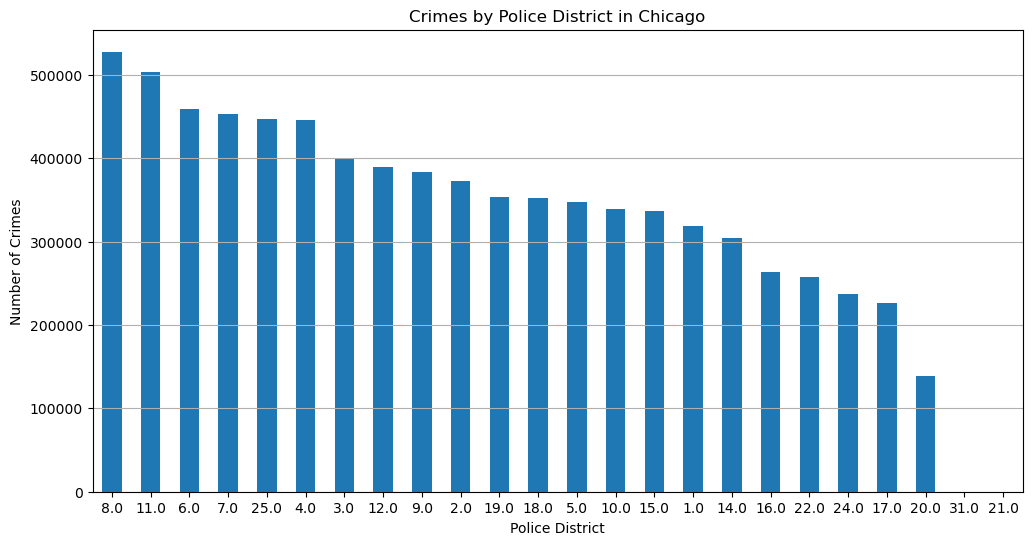

In [13]:
#Filters for plot.
counts_district=crime_data['District'].value_counts()
sorted_districts=counts_district.sort_values(ascending=False)
#Plot
plt.figure(figsize=(12,6))
sorted_districts.plot(kind='bar')
plt.xlabel('Police District')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Police District in Chicago')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

## District 8 has the highest crime rate.
## District 31 has the lowest crime rate.

# Topic 3:
* Are crimes more common during AM rush hour or PM rush hour?

> You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour

> You can consider any crime that occurred between 4 -7 PM as PM rush hour.

* What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

* Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [14]:
am_mask=(crime_data['Date'].dt.hour >= 7)&(crime_data['Date'].dt.hour<10)

In [15]:
pm_mask=(crime_data['Date'].dt.hour >= 16)&(crime_data['Date'].dt.hour<19)

In [16]:
top_5_am=crime_data.loc[am_mask,'Primary Type'].value_counts().head(5)

In [17]:
top_5_pm=crime_data.loc[pm_mask,'Primary Type'].value_counts().head(5)

In [18]:
mvt_am_count = crime_data.loc[am_mask & (crime_data['Primary Type'] == 'MOTOR VEHICLE THEFT')].shape[0]
mvt_pm_count = crime_data.loc[pm_mask & (crime_data['Primary Type'] == 'MOTOR VEHICLE THEFT')].shape[0]

In [19]:
rush_hour_counts = pd.DataFrame({'Time of Day':['AM Rush Hour','PM Rush Hour'],
                                 'Number of Crimes': [am_mask.sum(),pm_mask.sum()]})

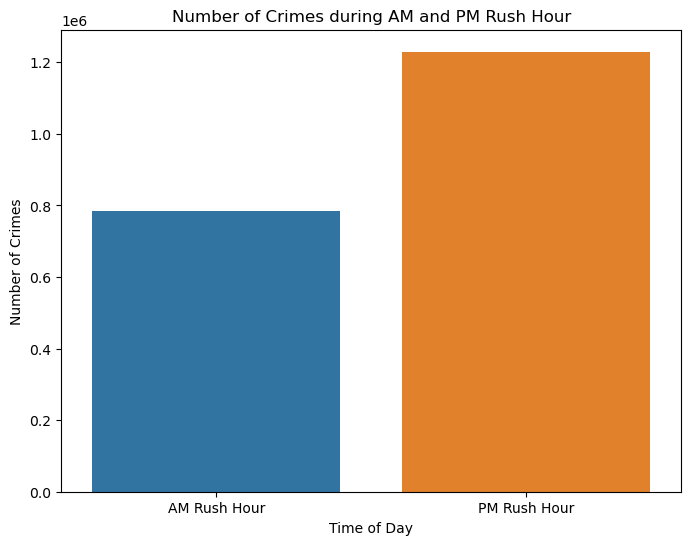

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x='Time of Day',y='Number of Crimes',data=rush_hour_counts)
plt.title('Number of Crimes during AM and PM Rush Hour')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.show()

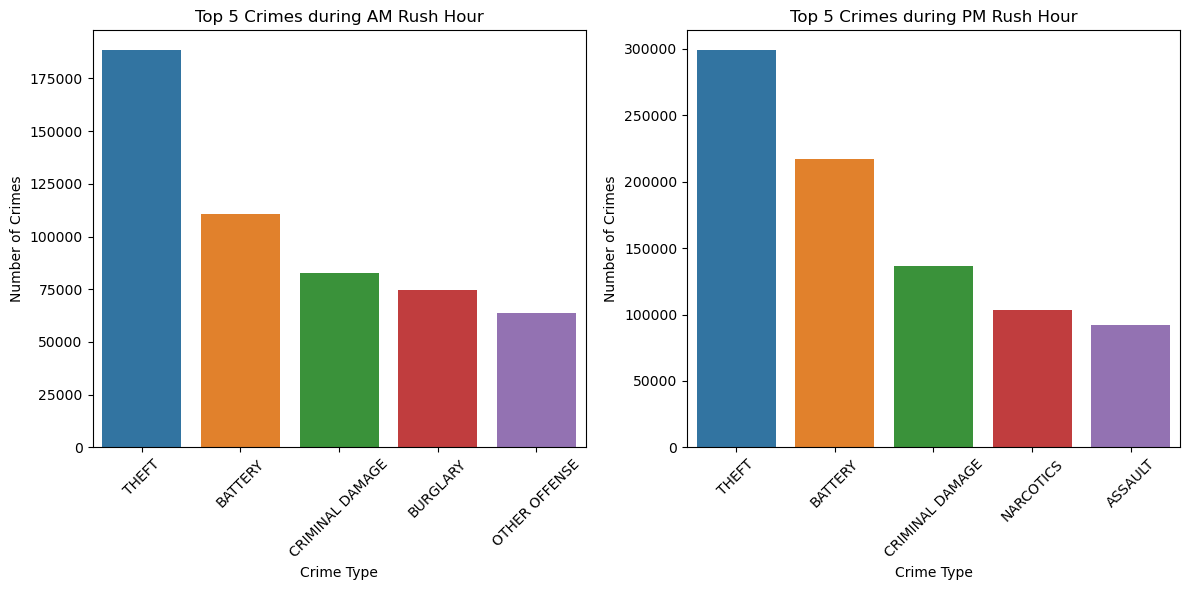

In [21]:
# Top 5 AM
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x=top_5_am.index,y=top_5_am.values)
plt.title('Top 5 Crimes during AM Rush Hour')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
# Top 5 PM
plt.subplot(1,2,2)
sns.barplot(x=top_5_pm.index,y=top_5_pm.values)
plt.title('Top 5 Crimes during PM Rush Hour')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
if mvt_am_count > mvt_pm_count:
    print("Motor Vehicle Thefts are more common during AM rush hour.")
elif mvt_am_count < mvt_pm_count:
    print("Motor Vehicle Thefts are more common during PM rush hour.")
else:
    print("Motor Vehicle Thefts are equally common during both AM and PM rush hours.")

Motor Vehicle Thefts are more common during PM rush hour.


# Topic 5
* Are there any holidays that show an increase in the # of crimes?

* Are there any holidays that show a decrease in the # of crimes?


In [23]:
number_of_crimes_on_holidays = crime_data.loc[crime_data['IsHoliday'] == 1].shape[0]
number_of_crimes_on_non_holidays = crime_data.loc[crime_data['IsHoliday'] == 0].shape[0]

In [24]:
#Instance for us holidays
us_holidays = country_holidays('US')
#Date range for the full dataset.
all_days = pd.date_range(crime_data["Date"].min(), crime_data["Date"].max())
#Get the us holidays for dates.
us_holiday_mapping = {day: us_holidays.get(day) for day in all_days}
#Mapping us holidays to data frame
crime_data["US Holiday"] = crime_data["Date"].map(us_holiday_mapping)
#Counting the crimes on holidays
us_holiday_crime_counts = crime_data.loc[crime_data['US Holiday'].notna()].groupby('US Holiday').size()

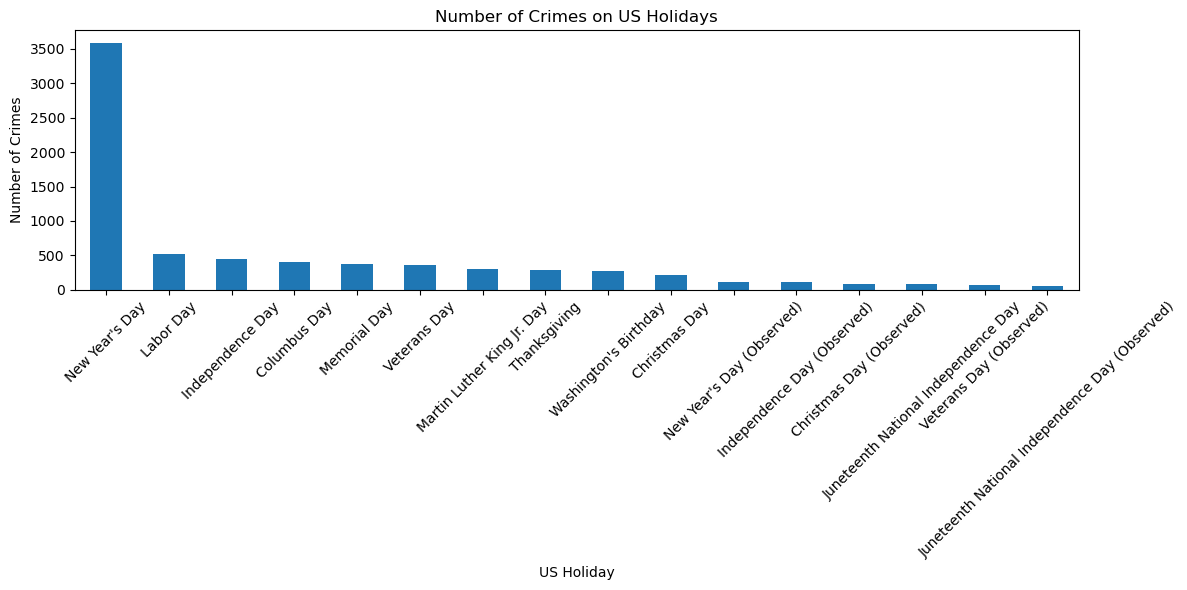

In [25]:
#Plot to show crimes on  holidays
plt.figure(figsize=(12, 6))
us_holiday_crime_counts.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('US Holiday')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes on US Holidays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#value counts true or false.
crime_data['Is_Holiday'] = crime_data['US Holiday'].notna()
print(crime_data['Is_Holiday'].value_counts())

False    7848902
True        7301
Name: Is_Holiday, dtype: int64
